In [1]:
from datasets import load_dataset
import ast
import matplotlib.pyplot as plt
import pandas as pd

c:\Users\FAIZAN AKHTAR\anaconda3\envs\pthon_data_project\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
my_dataset=load_dataset('lukebarousse/data_jobs')

In [3]:
df=my_dataset['train'].to_pandas()

In [4]:
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])

** Converting skills into list datatype

In [5]:
df['job_skills']=df['job_skills'].apply(lambda skill:ast.literal_eval(skill) if pd.notna(skill) else skill)

In [9]:
type(df['job_skills'][1])

list

## seperating it into the data coloumn

## Seperating the job posting for data analyst only

In [11]:
df=df[df['job_title_short']=='Data Analyst']

In [10]:
df_exploded=df.explode('job_skills')

Grouping and using tuple

In [17]:
skills_exploded=df_exploded.groupby('job_skills').agg(
    skill_count=('job_skills', 'count'),
    median_salary=('salary_year_avg', 'median')
)

In [27]:
skills_exploded.sort_values(by='skill_count', ascending=False).head(10)

,skill_count,median_salary
job_skills,,
sql,384849,120000.0
python,380909,125000.0
aws,145381,135000.0
azure,132527,125000.0
r,130892,119550.0
tableau,127213,111175.0
excel,127018,92500.0
spark,114609,140000.0
power bi,98147,102000.0


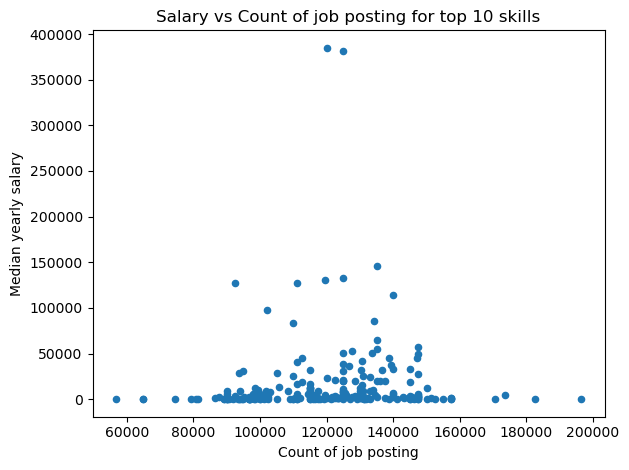

ValueError: Image size of 190885175x72626454 pixels is too large. It must be less than 2^23 in each direction.

<Figure size 640x480 with 1 Axes>

In [37]:
skills_exploded.plot(kind='scatter', y='skill_count', x='median_salary')
plt.xlabel('Count of job posting')
plt.ylabel('Median yearly salary')
plt.title('Salary vs Count of job posting for top 10 skills')
plt.tight_layout()
plt.show()
for i, txt in enumerate(skills_exploded.index):
    plt.text(skills_exploded['skill_count'].iloc[i], skills_exploded['median_salary'].iloc[i], txt)



In [31]:
type(skills_exploded)

pandas.core.frame.DataFrame

In [34]:
skills_exploded.values

array([[4.52540000e+04, 1.47090500e+05],
       [2.96000000e+02, 1.02500000e+05],
       [1.22970000e+04, 1.15000000e+05],
       [5.35400000e+03, 1.30000000e+05],
       [1.15000000e+02, 1.27050000e+05],
       [7.88900000e+03, 1.25000000e+05],
       [1.95000000e+02, 9.00000000e+04],
       [2.80000000e+02, 1.10002500e+05],
       [5.56000000e+02, 1.00000000e+05],
       [1.22600000e+03, 1.12021250e+05],
       [1.84000000e+02, 1.55000000e+05],
       [3.00000000e+00,            nan],
       [1.91800000e+03, 9.97557500e+04],
       [2.38400000e+03, 1.47500000e+05],
       [3.19500000e+03, 1.25000000e+05],
       [1.45381000e+05, 1.35000000e+05],
       [1.32527000e+05, 1.25000000e+05],
       [9.89400000e+03, 1.15000000e+05],
       [2.40490000e+04, 1.33000000e+05],
       [5.04500000e+03, 1.25000000e+05],
       [6.70000000e+01, 5.67000000e+04],
       [1.56990000e+04, 1.30500000e+05],
       [1.67870000e+04, 1.15000000e+05],
       [2.14040000e+04, 1.25000000e+05],
       [1.500000